In [241]:
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
import random

In [242]:
dsets = []
for i in range(32,40):         #Creating a list of all the datasets
    dsets.append(pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\Final_engine_sys_data\final_engine_dset_'+str(i)+'.csv'))
og = pd.read_csv('engine_system.csv')

In [243]:
og

,Unnamed: 0,61443-91,61444-512,61444-513
0,3,58.8,43.0,45.0
1,33,0.0,0.0,0.0
2,63,39.2,39.0,37.0
3,93,47.6,0.0,38.0
4,123,53.6,15.0,15.0
...,...,...,...,...
126724,3801723,0.0,0.0,0.0
126725,3801753,0.0,0.0,0.0
126726,3801783,0.0,0.0,0.0
126727,3801813,0.0,0.0,0.0


In [244]:
dsets[0]

,Unnamed: 0,61443-91,61444-512,61444-513
0,0,0.0,0.0,0.0
1,1,0.0,0.0,0.0
2,2,0.0,0.0,0.0
3,3,0.0,0.0,0.0
4,4,0.0,0.0,0.0
...,...,...,...,...
126724,126724,100.0,93.7,95.8
126725,126725,100.0,97.3,91.1
126726,126726,100.0,98.2,95.9
126727,126727,100.0,91.3,86.8


In [245]:
for i in range(len(dsets)):
    dsets[i].drop(['Unnamed: 0'], axis=1, inplace=True)

In [246]:
dsets[0]

,61443-91,61444-512,61444-513
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
126724,100.0,93.7,95.8
126725,100.0,97.3,91.1
126726,100.0,98.2,95.9
126727,100.0,91.3,86.8


In [247]:
#Function to plot moving average graph
def moving_avg(x, N=1000):
    return np.convolve(x, np.ones((N,))/N, mode='valid')

Below is the first type of fault introduced

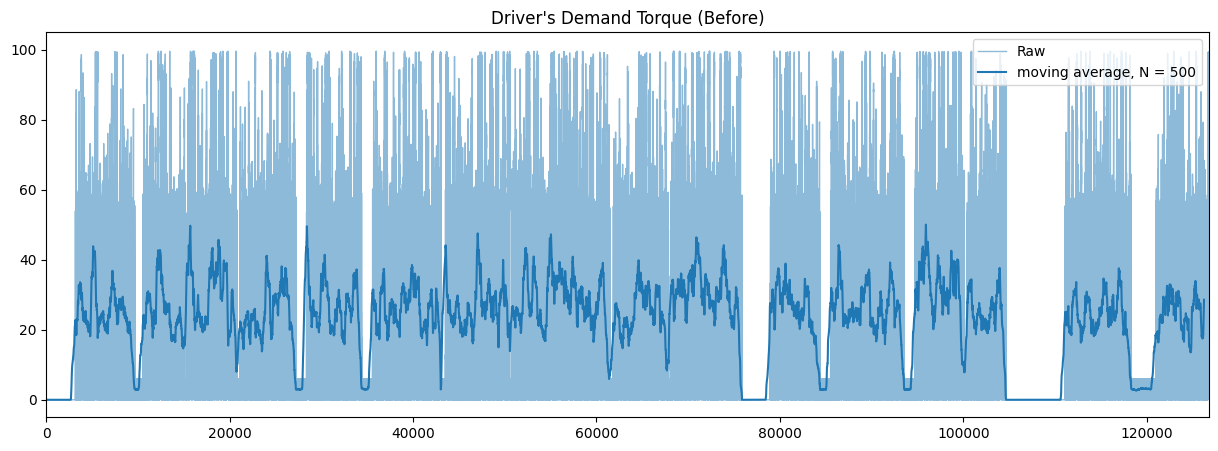

In [248]:
#Plotting the Driver's Demand without faults
plt.figure(figsize=(15,5))
plt.plot(dsets[0]['61444-512'], linewidth = 1, alpha = 0.5, label = 'Raw')
plt.plot(moving_avg(dsets[0]['61444-512'], 500), 'C0', label = 'moving average, N = 500')
plt.xlim(0,len(dsets[0]['61444-512']))
plt.ylim(-5,105)
plt.title('Driver\'s Demand Torque (Before)')
plt.legend()
plt.show()

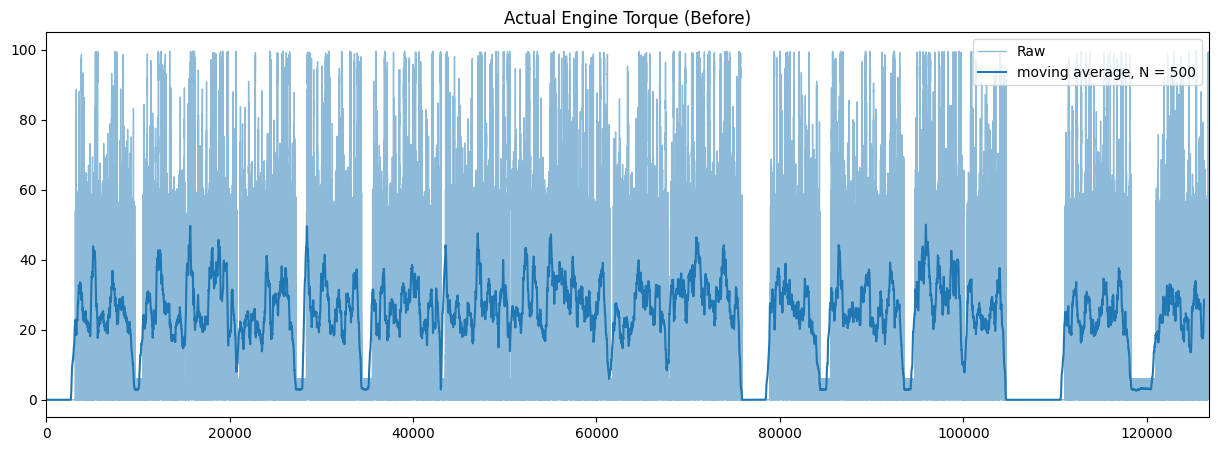

In [249]:
#Plotting the Actual Engine Torque without faults
plt.figure(figsize=(15,5))
plt.plot(dsets[0]['61444-512'], linewidth = 1, alpha = 0.5, label = 'Raw')
plt.plot(moving_avg(dsets[0]['61444-512'], 500), 'C0', label = 'moving average, N = 500')
plt.xlim(0,len(dsets[0]['61444-512']))
plt.ylim(-5,105)
plt.title('Actual Engine Torque (Before)')
plt.legend()
plt.show()

In [250]:
#Picking Dataset dsets[0] and dsets[1]
'''The first fault involves lowering the Driver's Demand level by 13% and the Actual Engine Torque by 14% or so to indicate that the accelerator pedal position is not accurately transmitted'''
for index, row in dsets[0].iterrows():
    if((row[1] - row[1] * 0.13) > 0 and (row[2] - row[2] * 0.14) > 0):
        dsets[0].loc[index, '61444-512'] -= row[1] * 0.13
        dsets[0].loc[index, '61444-513'] -= row[2] * 0.14
for index, row in dsets[1].iterrows():
    if((row[1] - row[1] * 0.15) > 0 and (row[2] - row[2] * 0.16) > 0):
        dsets[1].loc[index, '61444-512'] -= row[1] * 0.15
        dsets[1].loc[index, '61444-513'] -= row[2] * 0.16
dsets[0]['61444-512'] = dsets[0]['61444-512'].round(1)
dsets[1]['61444-512'] = dsets[1]['61444-512'].round(1)
dsets[0]['61444-513'] = dsets[0]['61444-513'].round(1)
dsets[1]['61444-513'] = dsets[1]['61444-513'].round(1)

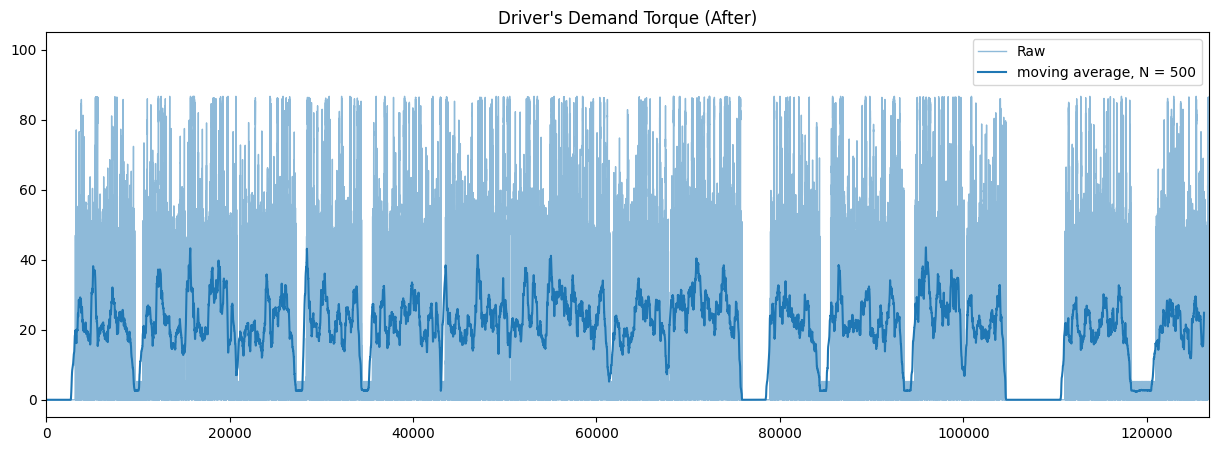

In [251]:
#Plotting the Driver's Demand with faults
plt.figure(figsize=(15,5))
plt.plot(dsets[0]['61444-512'], linewidth = 1, alpha = 0.5, label = 'Raw')
plt.plot(moving_avg(dsets[0]['61444-512'], 500), 'C0', label = 'moving average, N = 500')
plt.xlim(0,len(dsets[0]['61444-512']))
plt.ylim(-5,105)
plt.title('Driver\'s Demand Torque (After)')
plt.legend()
plt.show()

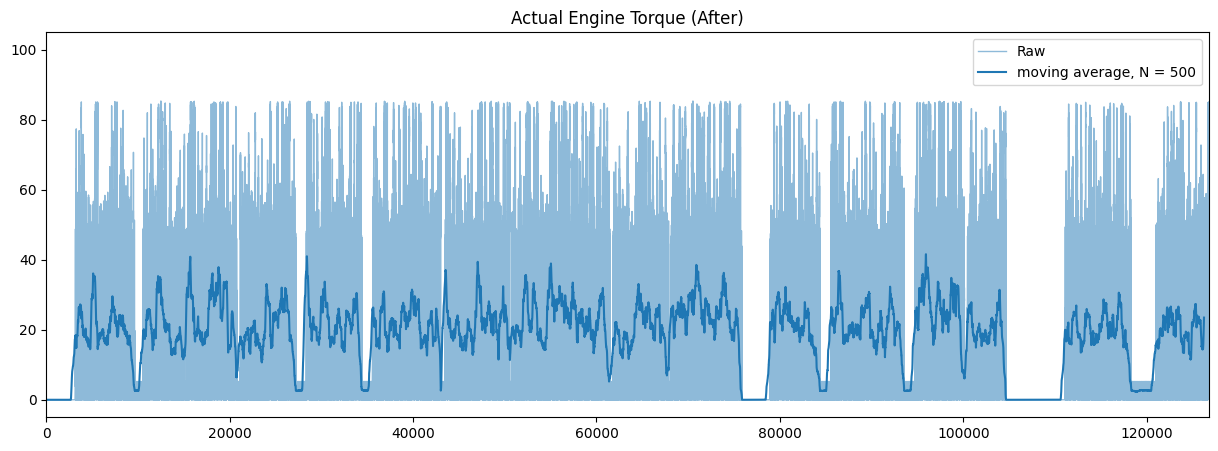

In [252]:
#Plotting the Actual Engine Torque with faults
plt.figure(figsize=(15,5))
plt.plot(dsets[0]['61444-513'], linewidth = 1, alpha = 0.5, label = 'Raw')
plt.plot(moving_avg(dsets[0]['61444-513'], 500), 'C0', label = 'moving average, N = 500')
plt.xlim(0,len(dsets[0]['61444-513']))
plt.ylim(-5,105)
plt.title('Actual Engine Torque (After)')
plt.legend()
plt.show()

Below is the second type of fault

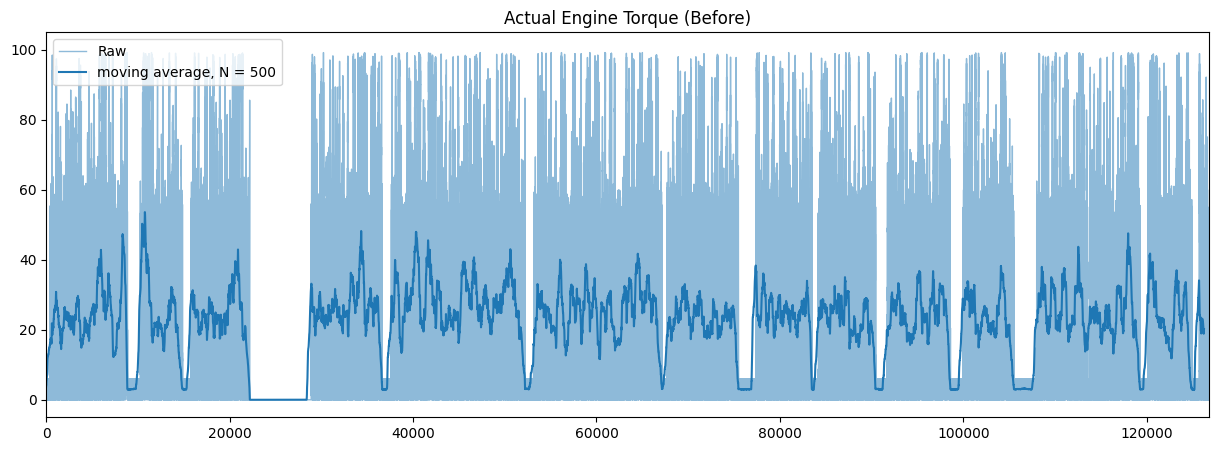

In [253]:
#Plotting the Actual Engine Torque without faults
plt.figure(figsize=(15,5))
plt.plot(dsets[2]['61444-513'], linewidth = 1, alpha = 0.5, label = 'Raw')
plt.plot(moving_avg(dsets[2]['61444-513'], 500), 'C0', label = 'moving average, N = 500')
plt.xlim(0,len(dsets[2]['61444-513']))
plt.ylim(-5,105)
plt.title('Actual Engine Torque (Before)')
plt.legend()
plt.show()

In [254]:
#Picking Dataset dsets[2] and dsets[3]
'''The first fault involves lowering the Actual Engine Torque by 15% or so to indicate a potential performance issue'''
for index, row in dsets[2].iterrows():
    if((row[2] - row[2] * 0.15) > 0):
        dsets[2].loc[index, '61444-513'] -= row[2] * 0.15
for index, row in dsets[3].iterrows():
    if((row[2] - row[2] * 0.18) > 0):
        dsets[3].loc[index, '61444-513'] -= row[2] * 0.18
dsets[2]['61444-512'] = dsets[2]['61444-513'].round(1)
dsets[3]['61444-512'] = dsets[3]['61444-513'].round(1)

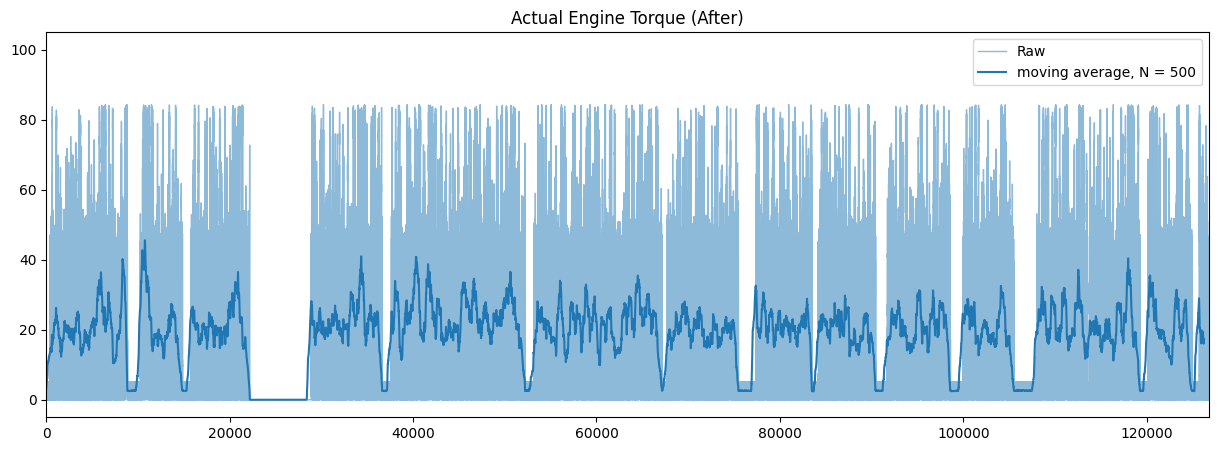

In [255]:
#Plotting the Actual Engine Torque with faults
plt.figure(figsize=(15,5))
plt.plot(dsets[2]['61444-513'], linewidth = 1, alpha = 0.5, label = 'Raw')
plt.plot(moving_avg(dsets[2]['61444-513'], 500), 'C0', label = 'moving average, N = 500')
plt.xlim(0,len(dsets[2]['61444-513']))
plt.ylim(-5,105)
plt.title('Actual Engine Torque (After)')
plt.legend()
plt.show()

Below is the third type of fault

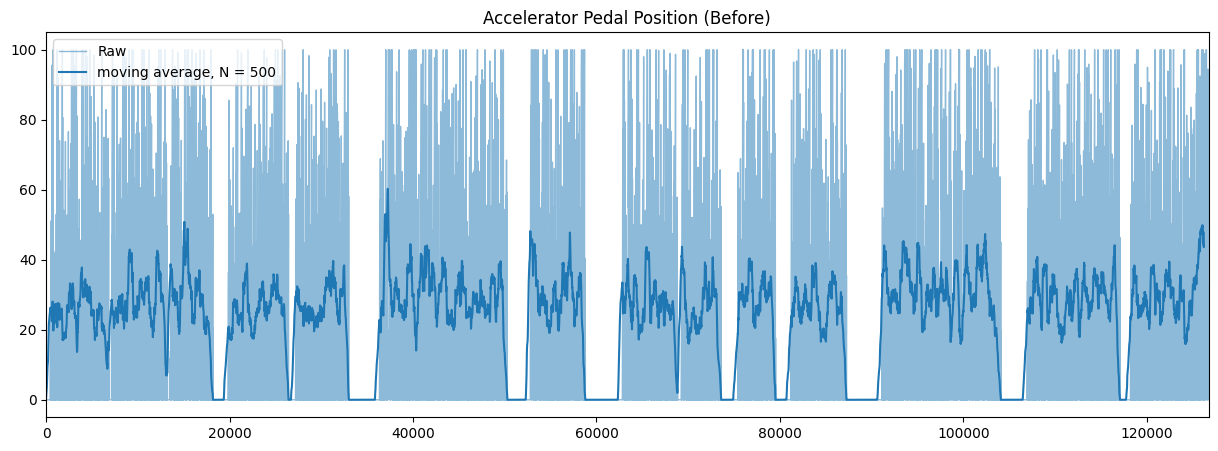

In [256]:
#Plotting the Accelerator Pedal Position without faults
plt.figure(figsize=(15,5))
plt.plot(dsets[4]['61443-91'], linewidth = 1, alpha = 0.5, label = 'Raw')
plt.plot(moving_avg(dsets[4]['61443-91'], 500), 'C0', label = 'moving average, N = 500')
plt.xlim(0,len(dsets[4]['61443-91']))
plt.ylim(-5,105)
plt.title('Accelerator Pedal Position (Before)')
plt.legend()
plt.show()

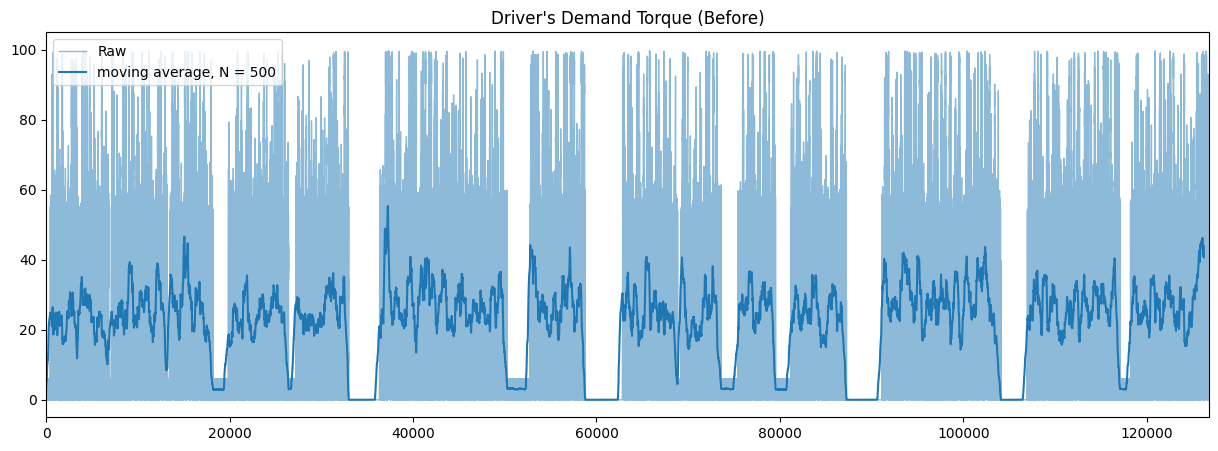

In [257]:
#Plotting the Driver's Demand without faults
plt.figure(figsize=(15,5))
plt.plot(dsets[4]['61444-512'], linewidth = 1, alpha = 0.5, label = 'Raw')
plt.plot(moving_avg(dsets[4]['61444-512'], 500), 'C0', label = 'moving average, N = 500')
plt.xlim(0,len(dsets[4]['61444-512']))
plt.ylim(-5,105)
plt.title('Driver\'s Demand Torque (Before)')
plt.legend()
plt.show()

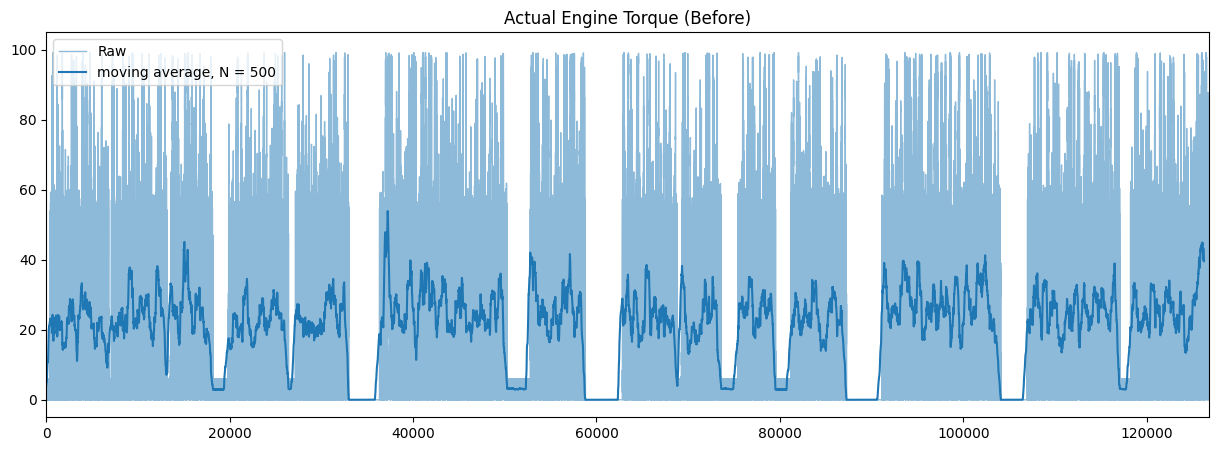

In [258]:
#Plotting the Actual Engine Torque without faults
plt.figure(figsize=(15,5))
plt.plot(dsets[4]['61444-513'], linewidth = 1, alpha = 0.5, label = 'Raw')
plt.plot(moving_avg(dsets[4]['61444-513'], 500), 'C0', label = 'moving average, N = 500')
plt.xlim(0,len(dsets[4]['61444-513']))
plt.ylim(-5,105)
plt.title('Actual Engine Torque (Before)')
plt.legend()
plt.show()

In [259]:
#Picking Dataset dsets[4] and dsets[5]
'''The third fault involves gradually lowering the accel pedal position as well as the other two sensors affected by it by 15% or so to indicate and issue in the accelerator pedal'''
valadd = 0.6/len(dsets[4])
val = 0
valadd1 = 0.7/len(dsets[4])
val1 = 0
valadd2 = 0.8/len(dsets[4])
val2 = 0
for index, row in dsets[4].iterrows():
    val += row[0] * valadd
    val1 += row[1] * valadd1
    val2 += row[2] * valadd2
    if(row[0] - val > 0):
        dsets[4].loc[index, '61443-91'] -= val
    if(row[1] - val1 > 0):
        dsets[4].loc[index, '61444-512'] -= val1
    if(row[2] - val2 > 0):
        dsets[4].loc[index, '61444-513'] -= val2

valadd = 0.8/len(dsets[4])
val = 0
valadd1 = 0.9/len(dsets[4])
val1 = 0
valadd2 = 1/len(dsets[4])
val2 = 0
for index, row in dsets[5].iterrows():
    val += row[0] * valadd
    val1 += row[1] * valadd1
    val2 += row[2] * valadd2
    if(row[0] - val > 0):
        dsets[5].loc[index, '61443-91'] -= val
    if(row[1] - val1 > 0):
        dsets[5].loc[index, '61444-512'] -= val1
    if(row[2] - val2 > 0):
        dsets[5].loc[index, '61444-513'] -= val2

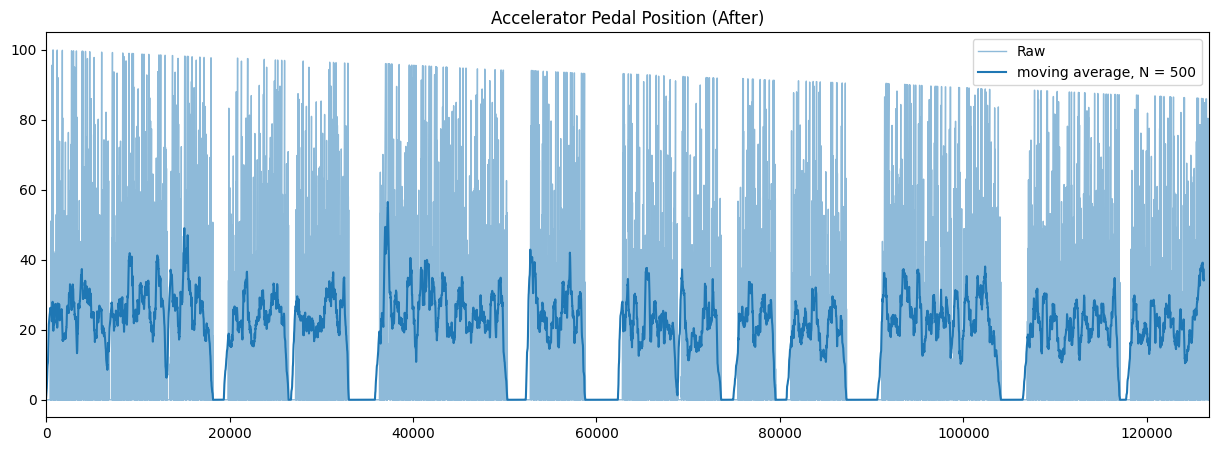

In [260]:
#Plotting the Accelerator Pedal Position with faults
plt.figure(figsize=(15,5))
plt.plot(dsets[4]['61443-91'], linewidth = 1, alpha = 0.5, label = 'Raw')
plt.plot(moving_avg(dsets[4]['61443-91'], 500), 'C0', label = 'moving average, N = 500')
plt.xlim(0,len(dsets[4]['61443-91']))
plt.ylim(-5,105)
plt.title('Accelerator Pedal Position (After)')
plt.legend()
plt.show()

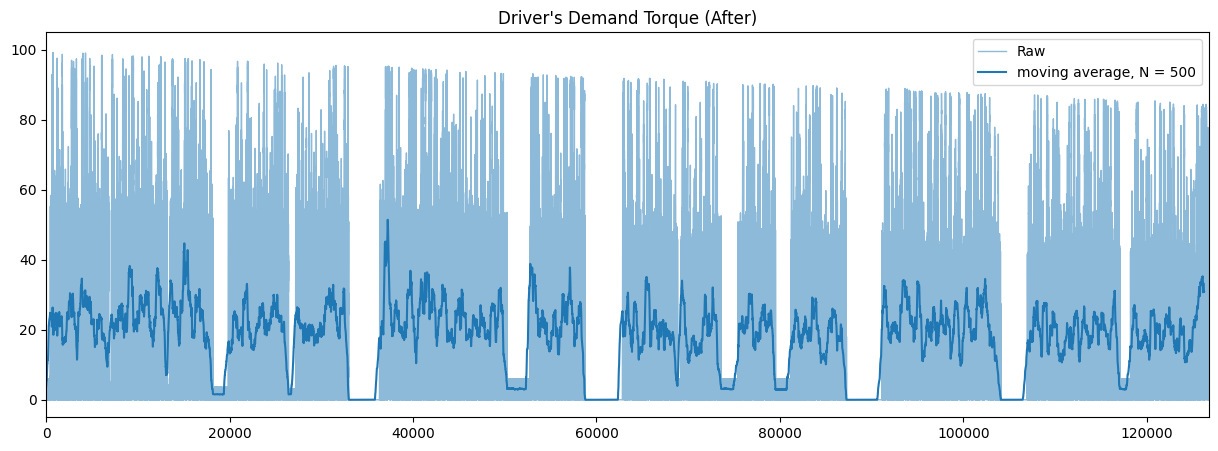

In [261]:
#Plotting the Driver's Demand with faults
plt.figure(figsize=(15,5))
plt.plot(dsets[4]['61444-512'], linewidth = 1, alpha = 0.5, label = 'Raw')
plt.plot(moving_avg(dsets[4]['61444-512'], 500), 'C0', label = 'moving average, N = 500')
plt.xlim(0,len(dsets[4]['61444-512']))
plt.ylim(-5,105)
plt.title('Driver\'s Demand Torque (After)')
plt.legend()
plt.show()

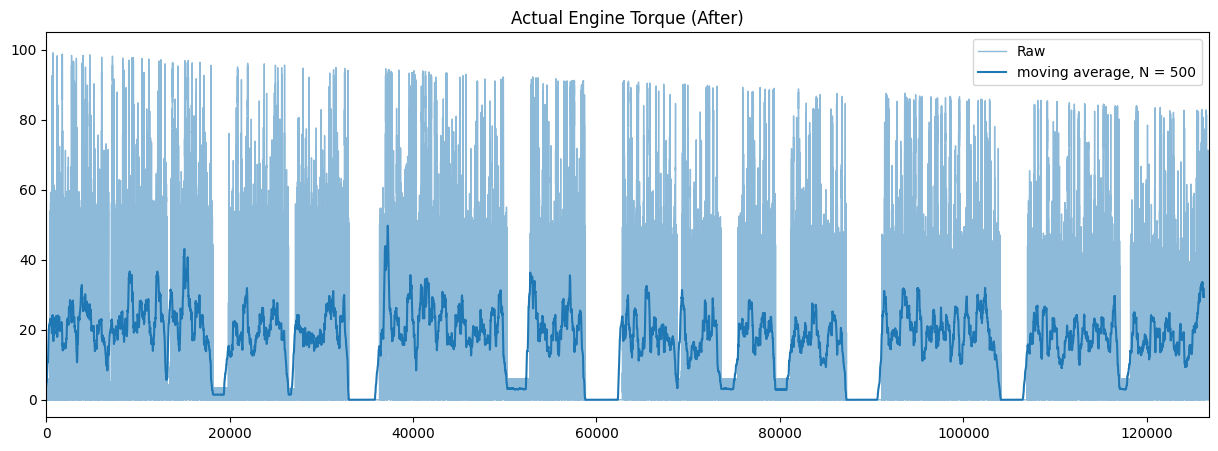

In [262]:
#Plotting the Actual Engine Torque with faults
plt.figure(figsize=(15,5))
plt.plot(dsets[4]['61444-513'], linewidth = 1, alpha = 0.5, label = 'Raw')
plt.plot(moving_avg(dsets[4]['61444-513'], 500), 'C0', label = 'moving average, N = 500')
plt.xlim(0,len(dsets[4]['61444-513']))
plt.ylim(-5,105)
plt.title('Actual Engine Torque (After)')
plt.legend()
plt.show()